Perform the following operations using R/Python on the data sets:
a) Compute and display summary statistics for each feature available in the dataset. (e.g.
minimum value, maximum value, mean, range, standard deviation, variance and
percentiles
b) Illustrate the feature distributions using histogram.
c) Data cleaning, Data integration, Data transformation, Data model building (e.g.
Classification)

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score


In [4]:
# Load dataset 
df=pd.read_csv("admission.csv")

In [5]:
# Display first few rows
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  


In [6]:
# Drop Columns which are not features
df=df.drop(columns=['Serial No.'])

In [7]:
# compute and display summary statistics
summary_stats=df.describe(include='all')
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
        GRE Score  TOEFL Score  University Rating         SOP        LOR  \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit  
count  500.000000  500.000000        500.00000  
mean     8.576440    0.560000          0.72174  
std      0.604813    0.496884          0.14114  
min      6.800000    0.000000          0.34000  
25%      8.127500    0.000000          0.63000  
5

In [8]:
# compute Additional statistics 
additional_stats=pd.DataFrame({
    'Range':df.max()-df.min(),
    'Variance': df.var(),
    'Standard Deviation' : df.std()
})
print("Additional Statistics: ")
print(additional_stats)

Additional Statistics: 
                   Range    Variance  Standard Deviation
GRE Score          50.00  127.580377           11.295148
TOEFL Score        28.00   36.989114            6.081868
University Rating   4.00    1.307619            1.143512
SOP                 4.00    0.982088            0.991004
LOR                 4.00    0.856457            0.925450
CGPA                3.12    0.365799            0.604813
Research            1.00    0.246894            0.496884
Chance of Admit     0.63    0.019921            0.141140


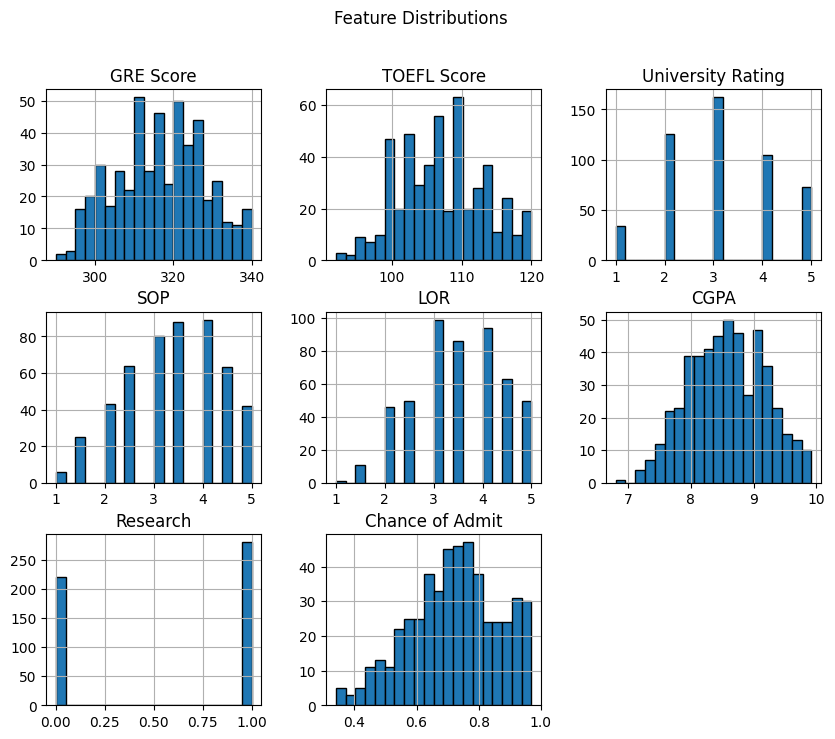

In [9]:
# illustrate features distributes using histograms
df.hist(figsize=(10,8),bins=20,edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

In [10]:
df=df.dropna()

In [11]:
x= df.drop(columns=['Chance of Admit'])
y=df['Chance of Admit'].apply(lambda x: 1 if x >= 0.5 else 0)


In [12]:
# Data Transformation: Standardizing features 
scaler =StandardScaler()
x_scaled =scaler.fit_transform(x)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [14]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = model.predict(x_test)

In [16]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 4  5]
 [ 0 91]]


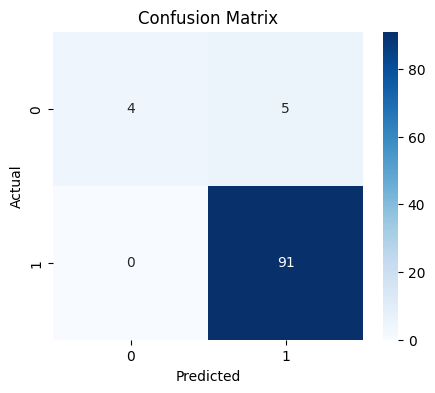

In [17]:
# plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Calcualte peformance matrics
accuracy=accuracy_score(y_test,y_pred)*100
precision=precision_score(y_test,y_pred)*100
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [19]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score:{f1:.2f}")

Accuracy: 95.00
Precision: 94.79
Recall: 1.00
F1-Score:0.97
